<a href="https://colab.research.google.com/github/lfr4704/DS-Unit-4-Sprint-3-Deep-Learning/blob/main/LS_DS_Unit_4_Sprint_Challenge_3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [27]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [28]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [30]:
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1

# TODO - your code!


In [31]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM


In [36]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 20
batch_size = 32

In [37]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 20)
x_test shape: (25000, 20)


In [41]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(maxlen, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))

Build model...


In [42]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Epoch 1/5
782/782 [==============================] - 81s 104ms/step - loss: 1.5235 - accuracy: 0.0521 - val_loss: 1.5235 - val_accuracy: 0.0172
Epoch 2/5
782/782 [==============================] - 81s 104ms/step - loss: 1.5235 - accuracy: 0.0541 - val_loss: 1.5235 - val_accuracy: 4.4000e-04
Epoch 3/5
782/782 [==============================] - 81s 104ms/step - loss: 1.5235 - accuracy: 0.0555 - val_loss: 1.5235 - val_accuracy: 0.0333
Epoch 4/5
782/782 [==============================] - 82s 105ms/step - loss: 1.5235 - accuracy: 0.0529 - val_loss: 1.5235 - val_accuracy: 0.0000e+00
Epoch 5/5
782/782 [==============================] - 5s 6ms/step - loss: 1.5235 - accuracy: 0.0055
Test score: 1.5235122442245483
Test accuracy: 0.00547999981790781


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*
`pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence`


## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*`Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video).`



## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*
`1. Time Series Prediction (Predictions are made for new data when the actual outcome may not be known until some future date).` 
`2. Handwritting recognition` 
`3. Speach recognition`


<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2, and you should also resize the images using scikit-image.

In [ ]:
from skimage.io import imread_collection

images = imread_collection('sample_data/frog_images/*.jpg')

In [ ]:
print(type(images))
print(type(images[0]), end="\n\n")

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>



In [ ]:
images[0]

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       ...,

       [[15, 16, 11],
        [14, 15, 10],
        [14, 15, 10],
        ...,
        [29, 29, 17],
        [28, 28, 16],
        [28, 28, 16]],

       [[14, 15, 10],
        [14, 15, 10],
        [14, 15, 10],
        ...,
        [29, 29, 17],
        [28, 28, 16],
        [28, 28, 16]],

       [[13, 14,  9],
        [13, 14,  9],
        [12, 13,  8],
        ...,
        [30, 30, 18],
        [30, 30, 18],
        [29, 29, 17]]], dtype=uint8)

In [ ]:
len(images)

15

Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
# TODO - your code!


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def process_image_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50V2(weights="imagenet")
    features = model.predict(x)
    results = decode_predictions(features)[0]
    for entry in results:
        if entry[1] == "frog":
            return result[2]
    return 0.0

In [22]:
import requests

image_path = ["https://ichef.bbci.co.uk/news/1024/cpsprodpb/103CF/production/_106211566_scheele2hr.jpg",
              "https://www.burkemuseum.org/sites/default/files/images/biology/herpetology/washington/northern-red-legged-frog1-1100x555.jpg"]

for _id,img in enumerate(image_path): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

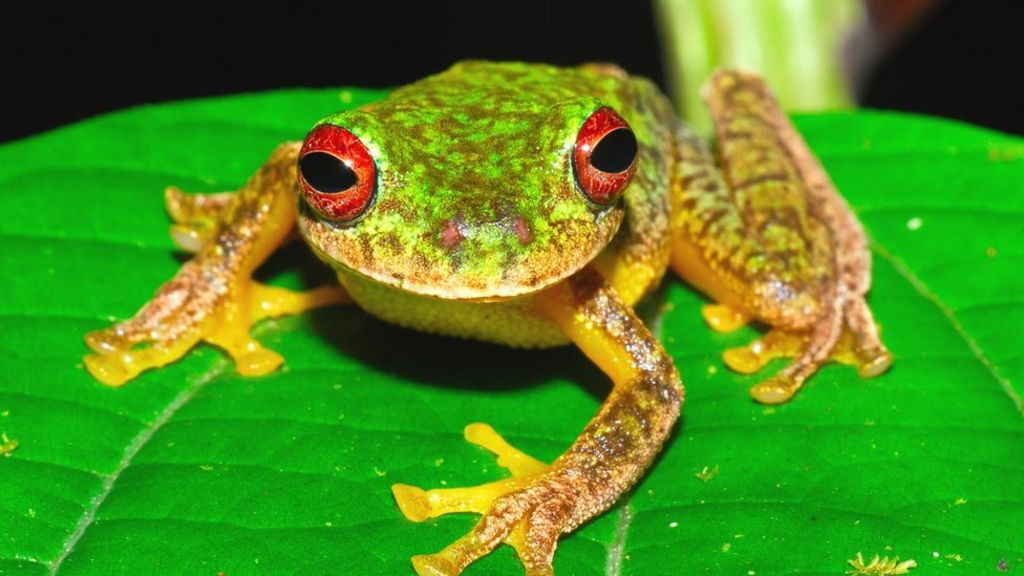

In [23]:
from IPython.display import Image
Image(filename='./example0.jpg', width=600)

In [26]:
img_contains_frog(process_image_path('example0.jpg'))

40960/35363 [==================================] - 0s 0us/step


0.0

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 
`Autoencoder has been successfully applied to the machine translation of human languages which is usually referred to as neural machine translation (NMT). In NMT, the language texts are treated as sequences to be encoded into the learning procedure, while in the decoder side the target languages will be generated.`


<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist? `My ability to continuously learn new material and is the my best ability as a Data Scientist. The pace of technology is very fast and if new methods are not applied to problem solving the profession will be behind.`
- What area of Data Science would you most like to learn more about, and why? `I would like to learn more about the development of algorithms and machine learning models that can reduce bias againt minorities and make the algorithms and models more ethical`
- Where do you think Data Science will be in 5 years? `I see myself implementing new processess and technology in the infrastructure indstry`
- What are the threats posed by AI to our society? `As metioned before, the the bias that affect minorities, such as in facial recognition.`
- How do you think we can counteract those threats? `These bias can be fixed if minority groups are part of the teams that are creating these models/algorithms`
- Do you think achieving General Artifical Intelligence is ever possible? `Yes and we are getting closer to that goal`

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [ ]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")